# K-means Clustering using scikit-learn
"This notebook corresponds to version {{ version }} of the pipeline tool: https://github.com/jiangshan123/Capstone_TDI"

This notebook begins with a cleanned CSV data and ends with k-means clustering results.

Data Cleanning pipline: https://github.com/jiangshan123/Capstone_TDI/blob/master/notebooks/data_wrangling.ipynb


## Overview

* Setup: load packages/setup path
* Load cleanned Data
* Find best k values
* k-means model
* PCA
* Clustering Visualization
* Save Results

The important scientific code is imported from the [Capstone_TDI](https://github.com/jiangshan123/Capstone_TDI) project. Refer to Capstone_TDI for additional documentation and citation information.

### DEV
* V1: Update k-means
*     Assign new data to cluster

## Setup

Import packages for I/O, visualization, and analysis.

In [20]:
%matplotlib inline

import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
from ipywidgets import widgets

## Control runs here

In [2]:
run_PCA = True

## import dataset

In [3]:
filePath = r"/Users/Rui/Documents/Doc/Job/Data Incubator/Capstone/Project/data/"
fileName_raw = filePath + r"user_data_rui_liu.csv"
fileName_clean = filePath + r"user_data_cleaned.csv"
savePath = r"/Users/Rui/Documents/Doc/Job/Data Incubator/Capstone/Project/results/"

In [116]:
df_raw = pd.read_csv(fileName_raw)
df = pd.read_csv(fileName_clean)

## find best K-values

In [5]:
X = df.values

In [171]:
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

In [25]:
%%time
#Find the number of clusters using elbow method
wcss = []
score = []
for i in range(2,25):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    #Kmeans.fit(X_std)
    y = Kmeans.fit_predict(X_std)
    wcss.append(Kmeans.inertia_)
    score.append(metrics.calinski_harabaz_score(X_std, y))

CPU times: user 7min 15s, sys: 39.1 s, total: 7min 54s
Wall time: 7min 17s


In [31]:
%%time
#Find the number of clusters using elbow method
wcss_X = []
score_X = []

for i in range(2,25):
    Kmeans_X = KMeans(n_clusters=i, init='k-means++', random_state=0)
    #Kmeans_X.fit(X)
    y_X = Kmeans_X.fit_predict(X)
    wcss_X.append(Kmeans_X.inertia_)
    score_X.append(metrics.calinski_harabaz_score(X, y_X))

CPU times: user 7min 24s, sys: 50 s, total: 8min 14s
Wall time: 7min 39s


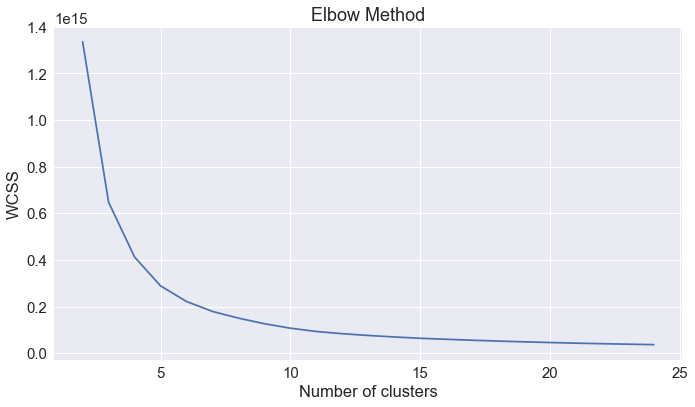

In [106]:
plt.figure(figsize=(10,6))
#plt.plot(range(2,25),wcss)
plt.plot(range(2,25),wcss_X)
#plt.plot(range(2,25),score)
#plt.plot(range(2,25),score_X)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.tight_layout()
plt.savefig(savePath + 'kmeans/Elbow_Method',dpi=100)

In [ ]:
%%time
#Find the number of clusters using Silhouette Coefficient
from sklearn import metrics
scores = []
for k in range(2,3):
    labels = KMeans(n_clusters=k, init='k-means++', random_state=0).fit(X_std).labels_
    score = metrics.silhouette_score(X_std, labels)
    scores.append(score)

In [ ]:
#Find the number of clusters
plt.plot(list(range(2,3)),scores)
#plt.xticks(range(0,22,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
sns.despine()

## K-means model

In [140]:
#KMeans cloustering
Kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y = Kmeans.fit_predict(X_std)

In [119]:
metrics.calinski_harabaz_score(X_std, y)  

2198.4572447565042

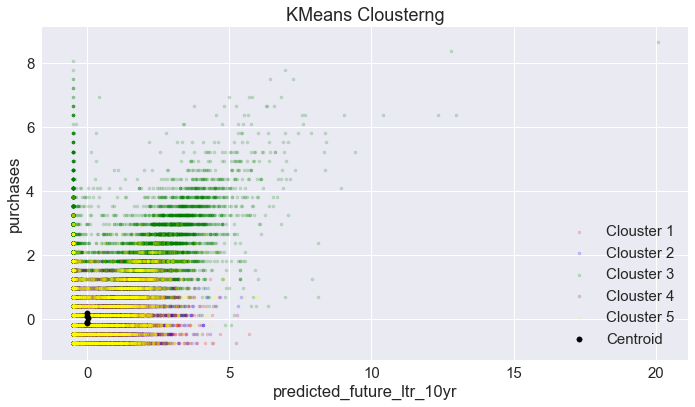

In [121]:
plt.figure(figsize=(10,6))

x_column = r'predicted_future_ltr_10yr'
y_column = r'purchases'
x_index = df.columns.get_loc(x_column)
y_index = df.columns.get_loc(y_column)

plt.scatter(X_std[y==0,x_index],X_std[y==0,y_index], s=10, c='red', label='Clouster 1',alpha = 0.2 )
plt.scatter(X_std[y==1,x_index],X_std[y==1,y_index], s=10, c='blue', label='Clouster 2' ,alpha = 0.2 )
plt.scatter(X_std[y==2,x_index],X_std[y==2,y_index], s=10, c='green', label='Clouster 3' ,alpha = 0.2 )
plt.scatter(X_std[y==3,x_index],X_std[y==3,y_index], s=10, c='purple', label='Clouster 4',alpha = 0.2  )
plt.scatter(X_std[y==4,x_index],X_std[y==4,y_index], s=10, c='yellow', label='Clouster 5',alpha = 0.2  )

plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s =30, c = 'black', label='Centroid')
plt.title("KMeans Clousterng")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()
plt.tight_layout()
plt.savefig(savePath + 'kmeans/kmeans_2D',dpi=100)

In [165]:
n_clusters = 5
size_clusters = []
for i in range(n_clusters):
    size_clusters.append(len(X_std[y==i]))
print("The sizes of the clusters are "+ str(size_clusters))

The sizes of the clusters are [21821, 18057, 9914, 16905, 17749]


In [167]:
len(X_std[0])

109

## PCA
### Explained Variance Measure

In [122]:
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [123]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

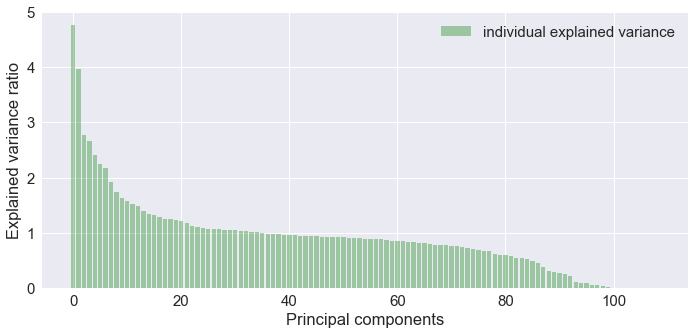

In [124]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
#plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig(savePath + 'PCA/Explained_variance_ratio',dpi=100)

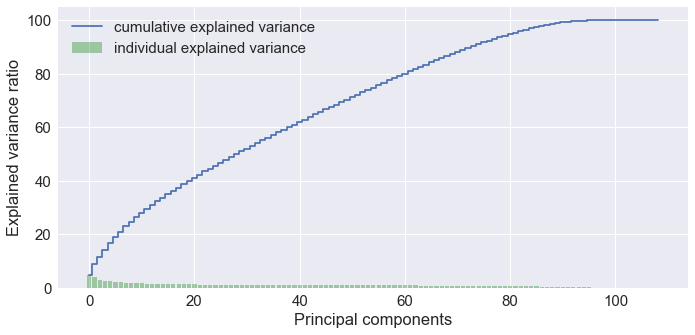

In [125]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig(savePath + 'PCA/Cumulative_variance_ratio',dpi=100)

### Retrace original features from PCA results

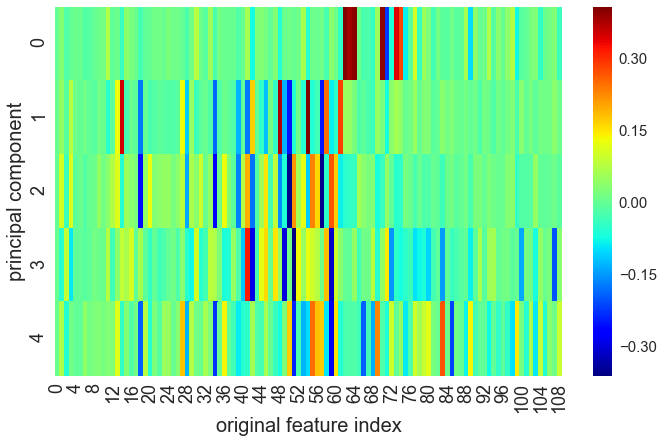

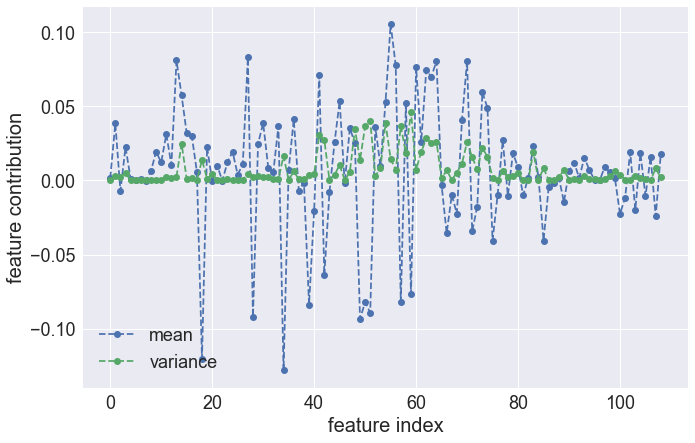

In [130]:
n_comp =5
pca_trafo = PCA(n_components=n_comp)
data = X

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(10, 6.5))
sns.heatmap(pca_trafo.inverse_transform(np.eye(n_comp)), cmap="jet", cbar=True)
plt.ylabel('principal component', fontsize=20);
plt.xlabel('original feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.tight_layout()
fig.savefig(savePath + 'PCA/P_vs_Features_5comp',dpi=100)

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
#plt.xlim([0, 29])
plt.legend(loc='lower left', fontsize=18)
plt.tight_layout()
fig.savefig(savePath + 'PCA/feature_contribution_5comp',dpi=100)

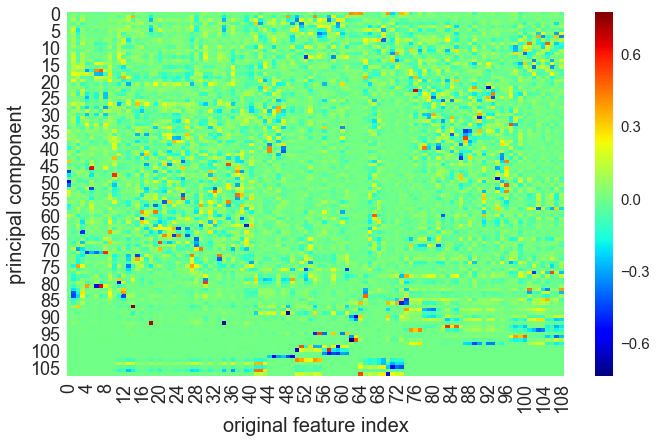

In [132]:
n_comp =108
pca_trafo = PCA(n_components=n_comp)
data = X

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(10, 6.5))
sns.heatmap(pca_trafo.inverse_transform(np.eye(n_comp)), cmap="jet", cbar=True)
plt.ylabel('principal component', fontsize=20);
plt.xlabel('original feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.tight_layout()
fig.savefig(savePath + 'PCA/P_vs_Features_oneTOone',dpi=100)

### Save PCA feature retrace table

In [135]:
import heapq
n_comp =10
pca_trafo = PCA(n_components=n_comp)
data = X

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))
top=10
P_features_index = [list(map(list(pca_inv_data[i]).index, heapq.nlargest(top, list(pca_inv_data[i])))) for i in range(n_comp)]
P_features = []
for i in range(n_comp):
    P_features.append([list(df)[j] for j in P_features_index[i]])

In [136]:
P_features_table = pd.DataFrame(P_features) 
P_features_table.columns = ['feature1', 'feature2', 'feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10',]
P_features_table.index = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10',]

In [137]:
P_features_table.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
P1,purchases,total_customer_type,total_customer_type,revenue,order_type_renewal,predicted_future_ltr_10yr,"COLOR_WHERE_\at_home\""""",pages_notloggedin,"GRAY_LEVEL_\more_than_50\""""",FREQUENCY_4
P2,utm_facebook,browser_facebook,pages_welcome,medium_fbigan,medium_other,device_mobile,pages_shop,pages_color-advisor,visitor_age,order_type_renewal
P3,medium_email,utm_google,utm_iterable,device_desktop,medium_organic,medium_cpc,browser_chrome,pages_product,pages_shopping,utm_bronto
P4,device_desktop,medium_other,browser_chrome,browser_ie,order_type_one-time,utm_other,utm_facebook,browser_firefox,pages_landing,pages_notloggedin
P5,"DO_WITH_HAIR_\change\""""",utm_google,customer_type_color,medium_cpc,pages_color-advisor,utm_direct,medium_none,medium_organic,"GRAY_LEVEL_\no_gray\""""",pages_product
P6,utm_direct,medium_none,visit_count,pages_shopping,customer_type_gloss,customer_type_rootreboot,browser_safari,customer_type_colorbar,device_tablet,order_type_one-time
P7,medium_email,"HAIR_COLOR_\blonde\""""",utm_bronto,"NATURAL_HAIR_COLOR_\blonde\""""",customer_type_color,utm_iterable,pages_notloggedin,visit_count,pages_product,pages_account
P8,"HAIR_COLOR_\brown\""""","NATURAL_HAIR_COLOR_\brown\""""",device_desktop,"GRAY_LEVEL_\less_than_50\""""",customer_type_color,browser_chrome,pages_account,"DO_WITH_HAIR_\change\""""",medium_none,utm_direct
P9,customer_type_gloss,"DO_WITH_HAIR_\change\""""",customer_type_colorbar,pages_colorbar,order_type_subscription,browser_chrome,customer_type_other,FREQUENCY_8,"GRAY_LEVEL_\no_gray\""""","NATURAL_HAIR_COLOR_\blonde\"""""
P10,"NATURAL_HAIR_COLOR_\black\""""","HAIR_COLOR_\black\""""",order_type_subscription,"COLOR_WHERE_\at_home\""""",pages_colorbar,customer_type_colorbar,"GRAY_LEVEL_\more_than_50\""""",visitor_age,FREQUENCY_2,FREQUENCY_3


In [138]:
P_features_table.to_csv(savePath + 'PCA/PCA_features.csv',index=True)

In [139]:
n_comp =108
pca_trafo = PCA(n_components=n_comp)
data = X

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))
top=108
P_features_index = [list(map(list(pca_inv_data[i]).index, heapq.nlargest(top, list(pca_inv_data[i])))) for i in range(n_comp)]
P_features = []
for i in range(n_comp):
    P_features.append([list(df)[j] for j in P_features_index[i]])
P_features_table = pd.DataFrame(P_features) 
P_features_table.columns = [f'Feature {i}' for i in range(1, top+1)]
P_features_table.index = [f'P {i}' for i in range(1, n_comp+1)]
P_features_table.to_csv(savePath + 'PCA/PCA_features_full.csv',index=True)

## Visulization
### PCA projection

Projecting 109-dimensional data to 2D


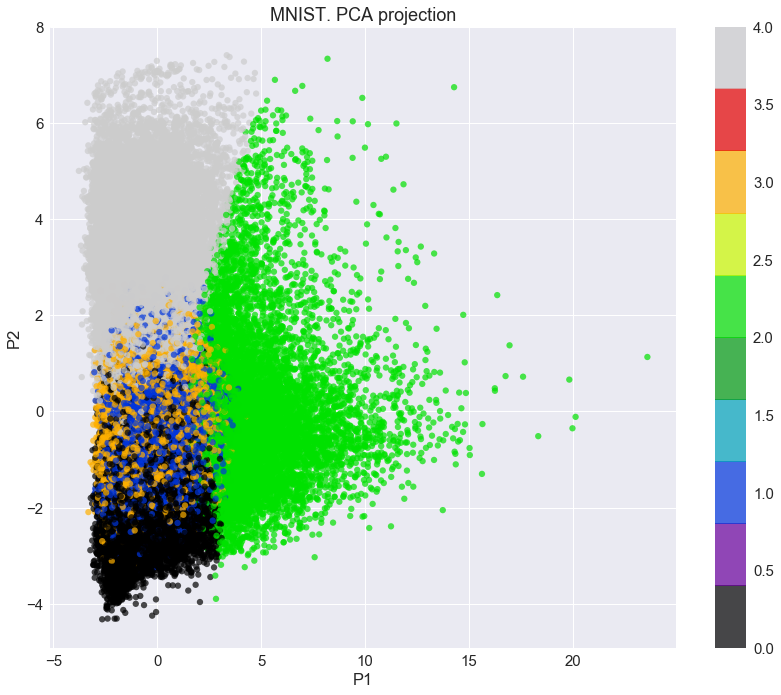

In [102]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
X_reduced = pca.fit_transform(X_std)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel("P1")
plt.ylabel("P2")

plt.colorbar()
plt.title('MNIST. PCA projection')
plt.tight_layout()
plt.savefig(savePath + 'visulization/PCA_P1P2',dpi=100)

### interactive PCA projection

In [93]:
from matplotlib import pylab as plt
from ipywidgets import interact
sns.set(font_scale=1.5)

def make_subplot(x1,x2,y_kmeans):
    plt.scatter(x1, x2, c=y_kmeans, 
                edgecolor='none', alpha=0.7, s=40,
                cmap=plt.cm.get_cmap('nipy_spectral', 10))
    #plt.ylim(-1.3,1.3)
    plt.title('MNIST. PCA projection')

    plt.colorbar()

# Fit/plot gradient boosting model and next term
def make_plot(n_clusters=5,n_components=5,P_x = 0,P_y=1,):
    Kmeans = KMeans(n_clusters, init='k-means++', random_state=0)
    y_kmeans = Kmeans.fit_predict(X_std)
    pca = decomposition.PCA(n_components)
    X_reduced = pca.fit_transform(X_std)

    print('Projecting %d-dimensional data to 2D' % X.shape[1])    
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 8)
    plt.subplot(1, 1, 1)
    plt.xlabel("P %d" % P_x)
    plt.ylabel("P %d" % P_y)
    make_subplot(X_reduced[:, P_x], X_reduced[:, P_y],y_kmeans)

interact(make_plot,n_clusters=(2,10), n_components=(2,10),P_x=(0,10),P_y=(0,10))

A Jupyter Widget

<function __main__.make_plot>

### t-SNE Projection

In [ ]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X_std)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')
plt.tight_layout()
plt.savefig(savePath + 'visulization/tSNE_P1P2',dpi=100)

### pair Plots

In [94]:
pca = decomposition.PCA(n_components=5)
x_5d = pca.fit_transform(X_std)

In [97]:
#Set a 5 KMeans clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_5d)

In [114]:
# Create a temp dataframe from our PCA projection data "x_5d"
df_PCA = pd.DataFrame(x_5d)
df_PCA = df_PCA[[0,1,2,]] # only want to visualise relationships between first 3 projections
df_PCA['X_cluster'] = X_clustered

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


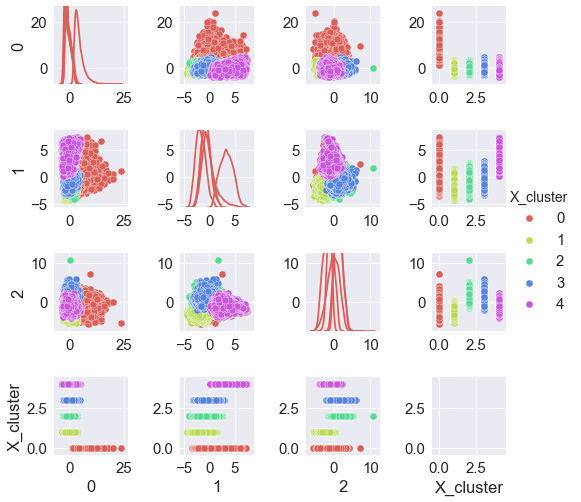

In [115]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns_plot = sns.pairplot(df_PCA, hue='X_cluster', palette= 'hls', diag_kind='kde',size=1.85)
sns_plot.savefig(savePath + 'visulization/pairplots',dpi=100)

## Assign new data to cluster

In [213]:
test_data = np.mean(X, axis=0).reshape(1,-1)
test_data = Kmeans.cluster_centers_[3].reshape(1,-1)

In [214]:
test_data_std = scaler.transform(test_data)
print(Kmeans.predict(test_data_std))

[3]
